# Вычисление площади двумерной фигуры с помощью метода Монте-Карло

## 1. Подключение библиотеки

Для простоты сократим hypersand до hs.

In [1]:
import hypersand as hs

## 2. Определение осей

Назовем оси для будущей двумерной фигуры: "x1" и "x2":

In [2]:
keys = ["x1",
        "x2"]

## 3. Генерация данных

Сгенерируем две синусоиды, состоящие из 10 периодов, с амплитудами от 4.5 до 5.5, сдвинутые вверх по оси y на 20, с частотой дискретизации 1e-2.

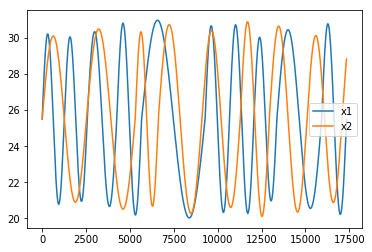

In [3]:
data = hs.generateDF(keys, periods=10, amplitudes=[4.5, 5.5], ground=20, sample_rate=1e-2)
data.plot()

## 4. Генерация случайных точек

Сгенерируем 100 случайных точек. Посмотрим, как наш график выглядит в фазовой плоскости. А так же, выведем сгенерированные точки.

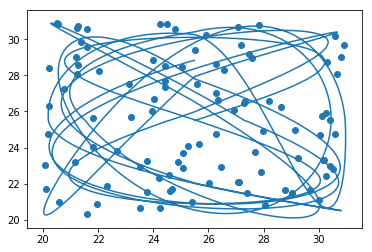

In [4]:
rp = hs.throw_points(data, 100)
hs.plt2d([data, rp], ["plot", "scatter"])

## 5. Пересечения для 0-й точки

Построим прямые, параллельные осям x1 и x2, пересекающие условную 0-ю точку, и найдем точки пересечения этих прямых с фигурой.

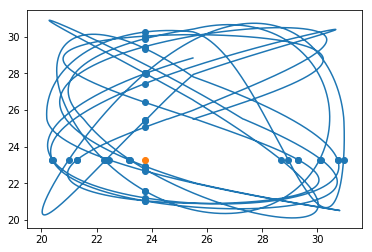

In [5]:
intersections = hs.get_intersections(data, rp.iloc[0], 1e-2)
hs.plt2d([data, intersections, rp.iloc[0]], ["plot", "scatter", "scatter"])

## 6. Определение попаданий

То же самое проделаем со всеми остальными точками. Если точка оказалась вне границ фигуры, будем считать, то она не попала в фигуру. Точность, с которой будем проверять попадания, выберем равной 1e-2.

Важно: вычисления могут занять достаточно долгое время. В данном случае порядка 5 минут. Время зависит от размерности, общего количества точек в фигуре, количества случайно сгенерированных точек, а так же от производительности процессора.

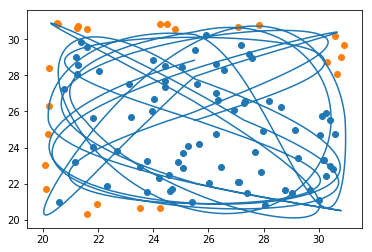

In [6]:
[hits, misses] = hs.hit_analysis(data, rp, 1e-2)
hs.plt2d([data, hits, misses], ["plot", "scatter", "scatter"])

## 7. Вычисление площади

Вычислим площадь внутренней части фигуры с помощью формулы: площадь фигуры = площадь прямоугольника * количество попаданий / общее количество бросков.

In [7]:
volume = hs.cuboid_volume(data) * len(hits) / len(rp)
print(volume)

89.71844015660974


Можно было пропустить пункты 5 и 6 - вызвать функцию, которая уже включает в себя операции из пунктов 5 и 6, и получить тот же ответ:

In [8]:
volume = hs.montecarlo(data, rp, 1e-2)
print(volume)

89.71844015660974
